### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import re

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
# Read a csv file and display the top 10 rows 
df = pd.read_csv('data/coupons.csv')
df.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [3]:
# Explore the Dataset 
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


2. Investigate the dataset for missing or problematic data.

### Data Cleaning 
Investigate bad data in the dataset, it could be in the form of 
- Empty cells
- Data in wrong format
- Wrong data
- Duplicates

In [4]:
# count null valaues in each column using isnull
df.isnull().sum(axis = 0)

# Observation: 
# The following rows has null values that needs to cleaned up
# car                     12576
# Bar                       107
# CoffeeHouse               217
# CarryAway                 151
# RestaurantLessThan20      130
# Restaurant20To50          189

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [5]:
# print the unique values in the Car column
df.car.value_counts()

# Output:
# Scooter and motorcycle                      22
# Mazda5                                      22
# do not drive                                22
# crossover                                   21
# Car that is too old to install Onstar :D    21

# Observation: 
# 1. There is no valid pattern to infer the data for the Car column 
# 2. More then ~99% of the values are null in this column
# Conclusion:
# 1. Drop the Car column in Qn.3


Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: car, dtype: int64

In [6]:
# verify that direction_same and direction_opposite are mutually exclusive 
df.query('direction_same == direction_opp')

# Observation:
# 1. There are no overlaps where the both "direction_same" and "direction_opp" has the same value 

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y


In [7]:
# verify that weather and temperature have a strong correlation 
# typecast weather to lower case to make the query simpler 

df['weather'] = df['weather'].str.lower()
df.query('(weather == "sunny") and (temperature !=80)')

# Observation 
# 1. There are3541 rows for sunny weather that doesn't have a temperature of 80. This shows there is a disconnect
# Conclusion 
# 1. Attempting to fix the weather data by matching the weather to the temperation 
# 2. The assumption made here is that temperature is correct and weather value mapping to temperature is incorrect
# 3. I made the assumption based on the value count on weather column where more then 95% of the values were "Sunny", proving this column could be biased

df.weather.value_counts()
# Output
# sunny    10069
# snowy     1405
# rainy     1210

def update_weather(temperature, weather):
    value = ""
    if temperature == 30:
        value = "snow"
    elif temperature == 55:
        value = "rain"
    else:
        value = "sunny"
    return value

df['weather'] = df.apply(lambda x: update_weather(x['temperature'], x['weather']), axis=1)
df.tail(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12674,Home,Alone,rain,55,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12675,Home,Alone,snow,30,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12676,Home,Alone,sunny,80,6PM,Restaurant(20-50),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12677,Home,Partner,snow,30,6PM,Restaurant(<20),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,1
12678,Home,Partner,snow,30,10PM,Restaurant(<20),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,1,0,0
12679,Home,Partner,rain,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,rain,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,snow,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,snow,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0
12683,Work,Alone,sunny,80,7AM,Restaurant(20-50),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0


In [29]:
# I referred a submitted assignment for solving this problem - https://github.com/priyatamv/kraftwerk/blob/main/assignment_5_1_starter/prompt.ipynb 

# convert the format of 1d, 2h into hours 
def convert_to_hours(duration):
    pattern = r'(\d+)([dh])'
    matches = re.findall(pattern, duration)
    
    total_hours = 0
    
    for match in matches:
        value = int(match[0])
        unit = match[1]
        
        if unit == 'd':
            total_hours += value * 24
        elif unit == 'h':
            total_hours += value
            
    return total_hours

# convert the 1d, 2h etc., to hours and store into expiration_hours column
df['expiration_hours'] = df['expiration'].apply(convert_to_hours)
df.head(2)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,direction_same,direction_opp,Y,expiration_hours,Y_String,direction,bar3,qualifying_condition_qn4,qualifying_condition_qn5,qualifying_condition_qn6
0,No Urgent Place,Alone,rain,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,0,1,1,24,accepted coupon,Opposite,0,False,False,True
1,No Urgent Place,Friend(s),sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,0,1,0,2,not accepted coupon,Opposite,0,False,False,True


3. Decide what to do about your missing data -- drop, replace, other...

In [9]:
# removing car column since it has too many null values and not enough data to enrich the column
del df['car']

In [10]:
# Value count for Bar Column
df.Bar.value_counts()

# Outputs:
# never    5197
# less1    3482
# 1~3      2473
# 4~8      1076
# gt8       349

# Observation - 
# 1. There are values missing in the Bar column
# Fix - 
# 1. "never" is the most frequently occuring value for this column, based on the finding I am filling the columns with null 
# with the value "never"

df["Bar"].fillna("never", inplace = True) 

In [11]:
# Explore Other Columns with null values 
df.CoffeeHouse.value_counts()
df.CarryAway.value_counts()
df.RestaurantLessThan20.value_counts()
df.Restaurant20To50.value_counts()

# Observation - 
# 1. The above columns has missing values 
# Fix - 
# 1. Instead of filling with most frequent values, for these columns I used the inbuilt backfill method

df = df.fillna(method = 'bfill')

In [12]:
# Adding friendly values in column 
# convert Y column Y=1 as Y="accepted coupon" and Y=0 as Y="not accepted coupon"
df["Y_String"] = np.where(df["Y"] == 1, "accepted coupon", "not accepted coupon")

In [13]:
# Merging column based on condition 
# convert the direction column to a single column with direction = Same or Opposite 
# The user can see whether the venue is in the same direction as the destination.

df['direction'] = df['direction_same'].apply(lambda x: 'Same' if x == 1 else 'Opposite')
df.tail()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,expiration_hours,Y_String,direction
12679,Home,Partner,rain,55,6PM,Carry out & Take away,1d,Male,26,Single,...,1~3,1,0,0,1,0,1,24,accepted coupon,Same
12680,Work,Alone,rain,55,7AM,Carry out & Take away,1d,Male,26,Single,...,1~3,1,0,0,0,1,1,24,accepted coupon,Opposite
12681,Work,Alone,snow,30,7AM,Coffee House,1d,Male,26,Single,...,1~3,1,0,0,1,0,0,24,not accepted coupon,Same
12682,Work,Alone,snow,30,7AM,Bar,1d,Male,26,Single,...,1~3,1,1,1,0,1,0,24,not accepted coupon,Opposite
12683,Work,Alone,sunny,80,7AM,Restaurant(20-50),2h,Male,26,Single,...,1~3,1,0,0,1,0,0,2,not accepted coupon,Same


4. What proportion of the total observations chose to accept the coupon? 



In [14]:
df.Y.value_counts()
# Output : 
# 7210 - Accepted coupon
# 5474 - Did not accept coupon 

count = df.groupby(['Y']).agg({'Y': 'count'}).reset_index(drop=True)
percent = (count['Y'] / count['Y'].sum()) * 100
print(f"Coupon Acceptance rate: {percent[0]:.2f}")
print(f"Coupon Rejection rate: {percent[1]:.2f}")

# Output:
# Coupon Acceptance rate: 43.16
# Coupon Rejection rate: 56.84

Coupon Acceptance rate: 43.16
Coupon Rejection rate: 56.84


5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, 'Types of Coupon')

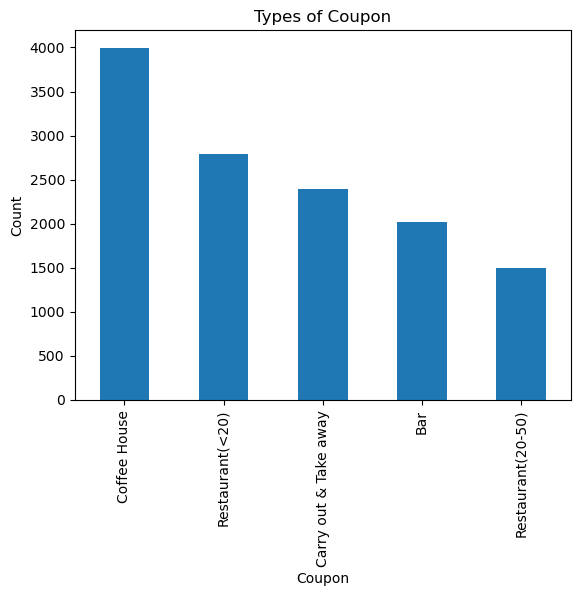

In [15]:
# bar play with matplotlib 
df1 = df['coupon'].value_counts()
ax = df1.plot.bar()
ax.set_xlabel('Coupon')
ax.set_ylabel('Count')
ax.set_title('Types of Coupon')

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Histogram of Temperature')

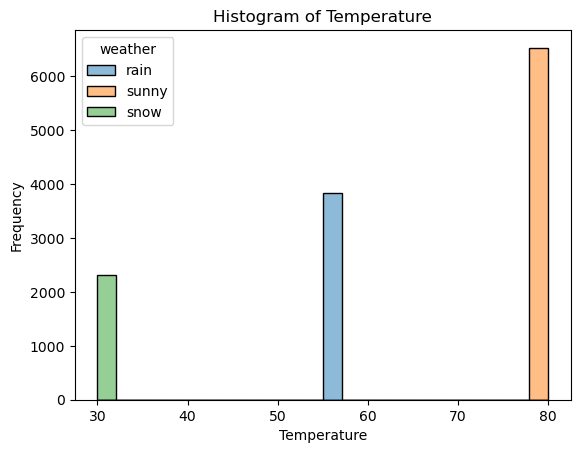

In [16]:
# using seaborn 
sns.histplot(data=df, x="temperature", hue="weather")

# Add labels and title to the plot
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature')

# Observation 
# 1. Since the weather data was updated to match the temperature they are appearing in the correct buckets. 

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [17]:
# Dataframe that contains Bar coupons 
barcoupons_df = df[df['coupon'].str.contains("Bar")]
barcoupons_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,expiration_hours,Y_String,direction
9,No Urgent Place,Kid(s),sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,1~3,1,1,0,0,1,0,24,not accepted coupon,Opposite
13,Home,Alone,rain,55,6PM,Bar,1d,Female,21,Unmarried partner,...,1~3,1,0,0,1,0,1,24,accepted coupon,Same
17,Work,Alone,rain,55,7AM,Bar,1d,Female,21,Unmarried partner,...,1~3,1,1,1,0,1,0,24,not accepted coupon,Opposite
24,No Urgent Place,Friend(s),sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,1,0,0,0,1,1,24,accepted coupon,Opposite
35,Home,Alone,rain,55,6PM,Bar,1d,Male,21,Single,...,less1,1,0,0,1,0,1,24,accepted coupon,Same
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),sunny,80,10PM,Bar,1d,Male,26,Single,...,1~3,1,1,0,0,1,0,24,not accepted coupon,Opposite
12664,No Urgent Place,Friend(s),rain,55,10PM,Bar,2h,Male,26,Single,...,1~3,1,1,0,0,1,0,2,not accepted coupon,Opposite
12667,No Urgent Place,Alone,rain,55,10AM,Bar,1d,Male,26,Single,...,1~3,1,1,0,0,1,0,24,not accepted coupon,Opposite
12670,No Urgent Place,Partner,rain,55,6PM,Bar,2h,Male,26,Single,...,1~3,1,1,0,0,1,0,2,not accepted coupon,Opposite


2. What proportion of bar coupons were accepted?


In [45]:
count = barcoupons_df.groupby(['Y']).agg({'Y': 'count'}).reset_index(drop=True)
percent = (count['Y'] / count['Y'].sum()) * 100
print("Percentage of Accepted Coupon = ", percent[0])
print("Percentage of Not Accepted Coupon = ", percent[1]) 

# output:
# Percentage of Accepted Coupon =  58.99851264253842
# Percentage of Not Accepted Coupon =  41.00148735746158

Percentage of Accepted Coupon =  43.070044709388974
Percentage of Not Accepted Coupon =  56.92995529061102


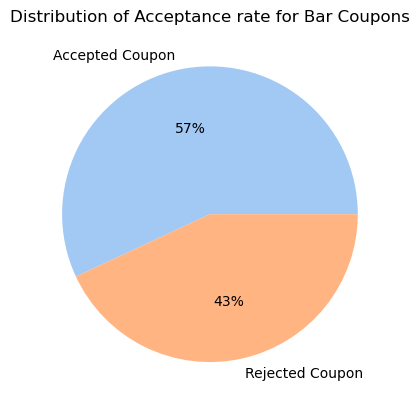

In [50]:
#define data
data = [barcoupons_df.query("Y==1").shape[0], barcoupons_df.query("Y==0").shape[0]]
labels = ['Accepted Coupon', 'Rejected Coupon']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Distribution of Acceptance rate for Bar Coupons')
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [56]:
# Observation - Since the bucketing of the bar is "1-3" and "4-8", we cannot evaluate for 3 or more
# Conclusion - To work around the problem the evaluaion is made for 4 or more visits 

# check for the qualifying condition 
def qualifying_condition(bar):
    if (bar in["4~8","gt8"]):
        return True 
    else:
        return False
    
df['qualifying_condition_qn3'] = df.apply(lambda x: qualifying_condition(x['Bar']), axis=1)
accepted_barcoupons_df = df[df['coupon'].str.contains("Bar")].query("Y==1")
accepted_by_more_than_3 = (accepted_barcoupons_df.query("qualifying_condition_qn3 == 1").shape[0] / accepted_barcoupons_df.shape[0]) * 100
accepted_by_less_than_3 = (accepted_barcoupons_df.query("qualifying_condition_qn3 == 0").shape[0] / accepted_barcoupons_df.shape[0]) * 100

print(f"Acceptance rate for those who went to a bar 3 or more times: {accepted_by_more_than_3:.2f}")
print(f"Acceptance rate for those who went to a bar less than 3 times: {accepted_by_less_than_3:.2f}")

# Observation:
# 1. People who go often to bar are less likely to accept a coupon 

Acceptance rate for those who went to a bar 3 or more times: 18.50
Acceptance rate for those who went to a bar less than 3 times: 81.50


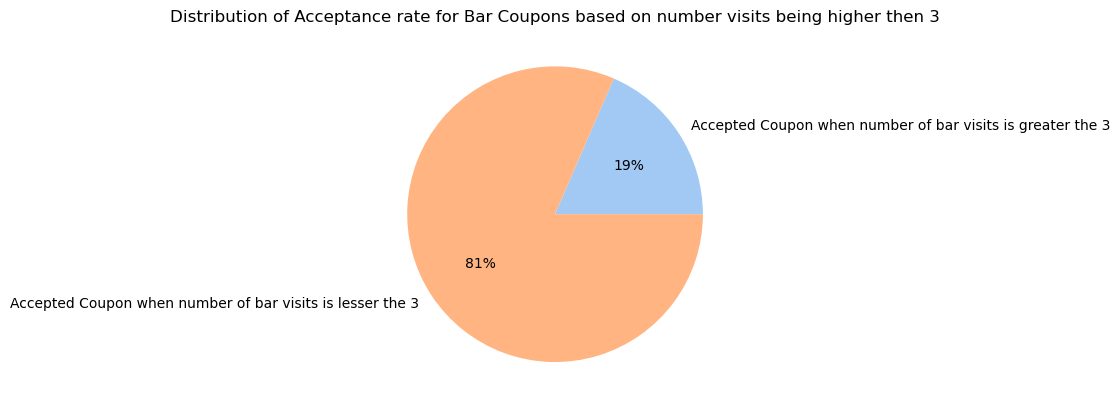

In [57]:
#define data
data = [accepted_barcoupons_df.query("qualifying_condition_qn3 == 1").shape[0], accepted_barcoupons_df.query("qualifying_condition_qn3 == 0").shape[0]]
labels = ['Accepted Coupon when number of bar visits is greater the 3', 'Accepted Coupon when number of bar visits is lesser the 3']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Distribution of Acceptance rate of Bar Coupons based on number visits being higher then 3')
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [58]:
#Data cleanup for Age field 
df['age'] = df['age'].apply(lambda x: "50" if x == "50plus" else x)
df['age'] = df['age'].apply(lambda x: "21" if x == "below21" else x)
df['age'] = df['age'].astype(int)

In [59]:
# check for the qualifying condition 
def qualifying_condition(age, bar):
    if ((age >25) and (bar in["1~3","4~8","gt8"])):
        return True 
    else:
        return False
    
df['qualifying_condition_qn4'] = df.apply(lambda x: qualifying_condition(x['age'], x['Bar']), axis=1)

barcoupons_df = df[df['coupon'].str.contains("Bar")]

accepted_by_qualifying_group = (barcoupons_df.query("Y==1 and qualifying_condition_qn4 == 1").shape[0] / barcoupons_df.shape[0]) * 100
accepted_by_everyone = (barcoupons_df.query("Y==1").shape[0] / barcoupons_df.shape[0]) * 100

print(f"Accepted Bar Coupon by Qualifying group = {accepted_by_qualifying_group:.2f}%")
print(f"Accepted Bar Coupon by Everyone = {accepted_by_everyone:.2f}%")

# Observation 
# 1. The Bar coupons has an overall acceptance rate of 41%
# 2. Out of the 41% acceptance rate for bar coupons ~14% of them visited bars more then once and were over the age of 25


Accepted Bar Coupon by Qualifying group = 14.48%
Accepted Bar Coupon by Everyone = 41.00%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [22]:
# check for the qualifying condition 
def qualifying_condition(occupation, bar, passanger):
    if (occupation != "Farming Fishing & Forestry") and (bar in["1~3","4~8","gt8"]) and (passanger not in ["Alone","Kid(s)"]):
        return True 
    else:
        return False

df['qualifying_condition_qn5'] = df.apply(lambda x: qualifying_condition(x['occupation'], x['Bar'], x['passanger']), axis=1)

# ------> Debugging help <---------
#barcoupons_df.qualifying_condition_qn6.value_counts()
#barcoupons_df.shape[0]
# ------> Debugging help <---------

barcoupons_df = df[df['coupon'].str.contains("Bar")].query("qualifying_condition_qn5 == 1") 
accepted_coupon = (barcoupons_df.query("Y==1").shape[0] / barcoupons_df.shape[0]) * 100
rejected_coupon = (barcoupons_df.query("Y==0").shape[0] / barcoupons_df.shape[0]) * 100

print("Condition -> Visits bar more then once, occupation is not Farming Fishing & Forestry and travels with passenger who is not a child")
print(f"Dataset size for the condition = {barcoupons_df.shape[0]}")
print(f"Accepted Bar Coupon = {accepted_coupon:.2f}%")
print(f"Rejected Bar Coupon = {rejected_coupon:.2f}%")

# Output 
# Condition -> Visits bar more then once, occupation is not Farming Fishing & Forestry and travels with passenger who is not a child
# Dataset size for the condition = 195
# Accepted Bar Coupon = 71.79%
# Rejected Bar Coupon = 28.21%

Condition -> Visits bar more then once, occupation is not Farming Fishing & Forestry and travels with passenger who is not a child
Dataset size for the condition = 195
Accepted Bar Coupon = 71.79%
Rejected Bar Coupon = 28.21%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [23]:
# check for the qualifying condition 
def qualifying_condition(bar, passanger, maritalStatus, age, RestaurantLessThan20, income):
    if ((bar in["1~3","4~8","gt8"]) and (passanger not in ["Alone","Kid(s)"]) and (maritalStatus != "Widowed")) or ((bar in["1~3","4~8","gt8"] and age < 30)or (RestaurantLessThan20 in["4~8","gt8"]) and (income in ["$25000 - $37499","$12500 - $24999", "$37500 - $49999","Less than $12500"])):
        return True 
    else:
        return False

df['qualifying_condition_qn6'] = df.apply(lambda x: qualifying_condition(x['Bar'], x['passanger'], x['maritalStatus'], x['age'], x['RestaurantLessThan20'], x['income']), axis=1)
  
barcoupons_df = df[df['coupon'].str.contains("Bar")].query("qualifying_condition_qn6 == 1") 
accepted_coupon = (barcoupons_df.query("Y==1").shape[0] / barcoupons_df.shape[0]) * 100
rejected_coupon = (barcoupons_df.query("Y==0").shape[0] / barcoupons_df.shape[0]) * 100

print("Condition -> Q6")
print(f"Dataset size for the condition = {barcoupons_df.shape[0]}")
print(f"Accepted Bar Coupon = {accepted_coupon:.2f}%")
print(f"Rejected Bar Coupon = {rejected_coupon:.2f}%")


Condition -> Q6
Dataset size for the condition = 671
Accepted Bar Coupon = 56.93%
Rejected Bar Coupon = 43.07%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Observations  

The overall Acceptance rate for any coupon is = 43.16%
The overall Acceptance rate for a Bar coupon is = 41.00%
Acceptance rate across 
- Acceptance rate for those who go to a bar 3 or more times = 19%
- Acceptance rate for those who go to bar more than once a month and are over the age of 25 = 14.58%
- Acceptance rate for those who go to bar more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry = 71.79%
- Acceptance rate for those who are young and single starting their career(lower income) - 59% 

### Conclusions  
1. Overall the bar coupons acceptance rates is on par with other types of coupons 
2. The worst category to target would be individuals who frequent bar more often.
3. Having a kid in the car is a deterrent to accepting the Coupon. Which is great, shows the drivers are responsible 

### Futher invetigation Required 
1. Does the length of the day determine if the bar coupon is accepted. Example, it gets darker earlier in the day in winters, will this influence people to accept the coupon
2. Expiration duration - if the coupon has a longer expiration duration is the acceptance rate higher. Example, if the coupon had a 24hour expiration and if I am driving with a child in the car, I would still accept it but go to the bar later after dropping off my kid

### Not enough Data 
1. Value and type of the bar coupon. Example a "buy 1 get and 1 drink free" might perform better then "10% off a drink" 


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [64]:
# Exploring coffee house coupons, since its the most common coupon  
df1 = df['coupon'].value_counts()
# Dataframe that contains Coffee coupons 
coffeecoupons_df = df[df['coupon'].str.contains("Coffee")]
coffeecoupons_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,direction_opp,Y,expiration_hours,Y_String,direction,bar3,qualifying_condition_qn4,qualifying_condition_qn5,qualifying_condition_qn6,qualifying_condition_qn3
1,No Urgent Place,Friend(s),sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,1,0,2,not accepted coupon,Opposite,0,False,False,True,False
3,No Urgent Place,Friend(s),sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,1,0,2,not accepted coupon,Opposite,0,False,False,True,False
4,No Urgent Place,Friend(s),sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,1,0,24,not accepted coupon,Opposite,0,False,False,True,False
12,No Urgent Place,Kid(s),rain,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,1,1,2,accepted coupon,Opposite,0,False,False,True,False
15,Home,Alone,sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,1,0,2,not accepted coupon,Opposite,0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,snow,30,10PM,Coffee House,2h,Male,31,Married partner,...,1,0,2,not accepted coupon,Opposite,0,False,False,False,False
12659,Work,Alone,snow,30,7AM,Coffee House,1d,Male,31,Married partner,...,0,0,24,not accepted coupon,Same,0,False,False,False,False
12674,Home,Alone,rain,55,10PM,Coffee House,2h,Male,26,Single,...,0,0,2,not accepted coupon,Same,0,False,False,False,False
12675,Home,Alone,snow,30,10PM,Coffee House,2h,Male,26,Single,...,1,0,2,not accepted coupon,Opposite,0,False,False,False,False


In [65]:
# Acceptance rate for coffee coupons 
count = coffeecoupons_df.groupby(['Y']).agg({'Y': 'count'}).reset_index(drop=True)
percent = (count['Y'] / count['Y'].sum()) * 100
print("Percentage of Accepted Coupon = ", percent[0])
print("Percentage of Not Accepted Coupon = ", percent[1]) 

# output:
# Percentage of Accepted Coupon =  50.07507507507507
# Percentage of Not Accepted Coupon =  49.92492492492492

Percentage of Accepted Coupon =  50.07507507507507
Percentage of Not Accepted Coupon =  49.92492492492492


In [ ]:
# Acceptance rate for coffee coupons grouped by age, gender and marialstatus 

